# Check Robot Logs

Select File To Analyze

In [54]:
from ipywidgets import Button, Checkbox, VBox
from tkinter import Tk, filedialog
from IPython.display import clear_output, display

# Select File From System
selected_file = ''

def select_files(b):
    clear_output()
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    b.files = filedialog.askopenfilename(multiple=True)

fileselect = Button(description="Select Log File")
fileselect.on_click(select_files)
select_files(fileselect)
# display(fileselect)

Select Logged Data To Plot

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%matplotlib widget

# Check Selected File
if len(fileselect.files) > 0:
    selected_file = fileselect.files[0] # could put different files enableagainst each other, but this works for now
    print('Selected {}'.format(selected_file))
else:
    print('No Files Selected')

# Get Columns From Data File
df = pd.read_csv(selected_file)


Selected /home/nick/dev/logs/blackout/robot-00012-dl.log


In [65]:

cols = np.array(df.columns)
checkboxes = [Checkbox(value=False, description=col) for col in cols]
output = VBox(children=checkboxes)
display(output)

Plot Selected Data

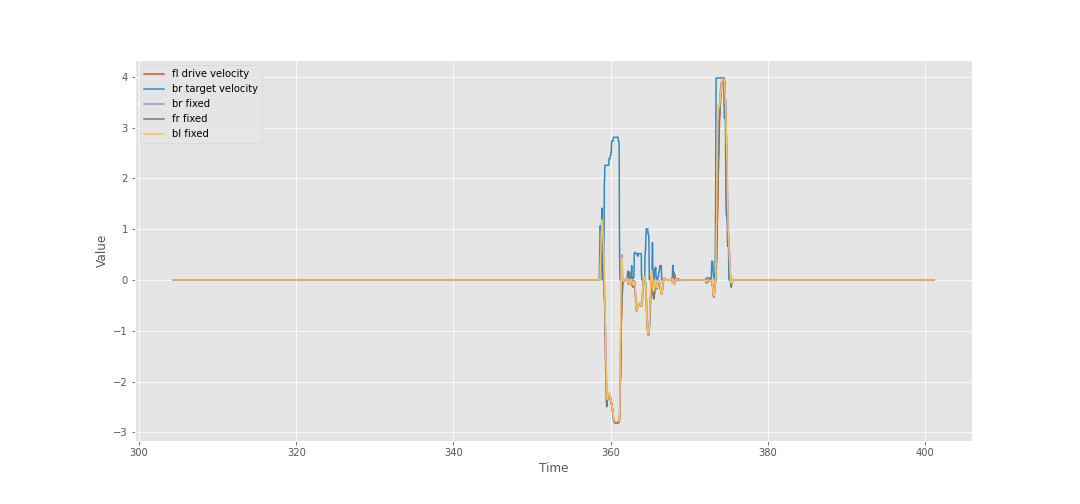

In [69]:
# Get Selected Columns
plt.clf()
selected_cols = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_cols.append(checkboxes[i].description)

# Plot Columns
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 7)
plt.xlabel("Time")

plt.ylabel("Value")
x = df['Timestamp'].to_list()
for col in selected_cols:
    y = df[col].to_list()
    plt.plot(x,y, label=col)
plt.legend(loc='upper left')
plt.show()

In [68]:
df["br fixed"] = -df["br drive velocity"]
df["fr fixed"] = -df["fr drive velocity"]
df["bl fixed"] = -df["bl drive velocity"]



Plot Points on Field (`poseX`, `poseY`)

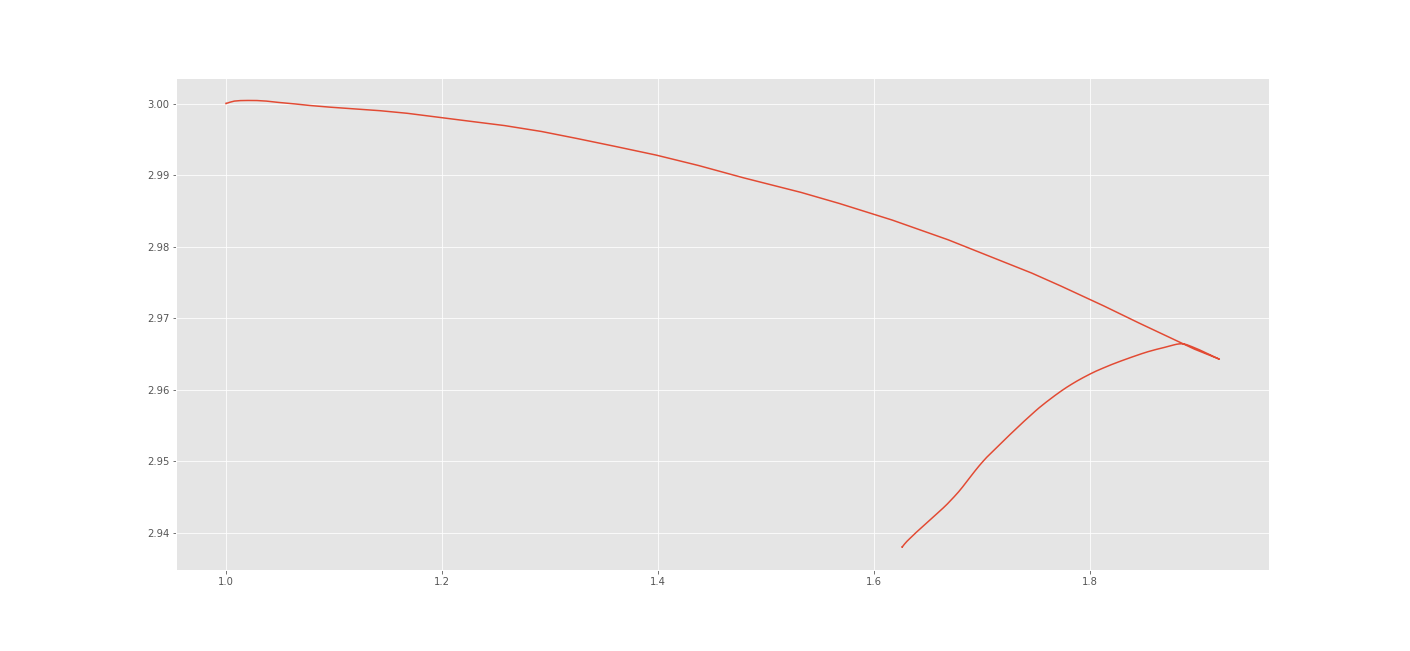

In [21]:
plt.clf()
plt.rcParams["figure.figsize"] = (30,15)
x = df['poseX'].to_list()
y = df['poseY'].to_list()
plt.plot(x,y)
plt.show()